In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import silhouette_score


data_não_normalizada = pd.read_csv("./BankChurners.csv")
data = data_não_normalizada

In [3]:
print(data.describe())
print(data.info())
print(data.head())
data.head()


          CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
count  1.012700e+04  10127.000000     10127.000000    10127.000000   
mean   7.391776e+08     46.325960         2.346203       35.928409   
std    3.690378e+07      8.016814         1.298908        7.986416   
min    7.080821e+08     26.000000         0.000000       13.000000   
25%    7.130368e+08     41.000000         1.000000       31.000000   
50%    7.179264e+08     46.000000         2.000000       36.000000   
75%    7.731435e+08     52.000000         3.000000       40.000000   
max    8.283431e+08     73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%            

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [4]:
print(data.isnull().sum())
data = data.drop(columns=['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'])


CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

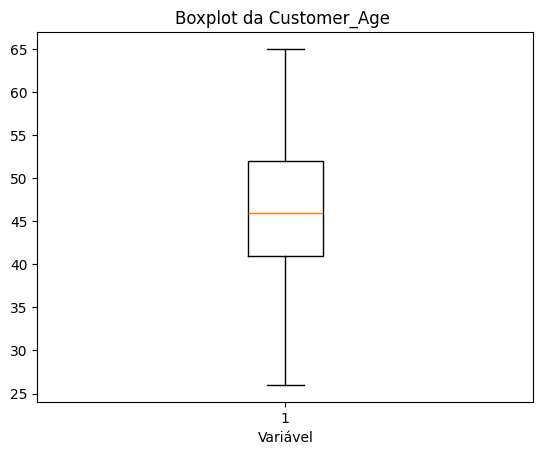

In [5]:
limite = 66

data = valores_filtrados = data[data['Customer_Age'] < limite]
plt.boxplot(data['Customer_Age'])
plt.title('Boxplot da Customer_Age ')
plt.xlabel('Variável')
plt.show()


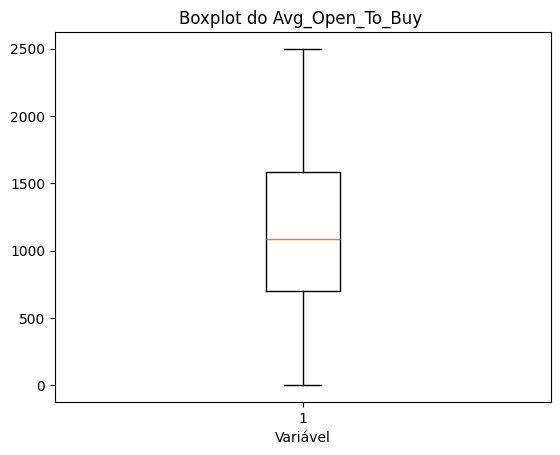

In [6]:
limite = 2500

data = valores_filtrados = data[data['Avg_Open_To_Buy'] < limite]
plt.boxplot(data['Avg_Open_To_Buy'])
plt.title('Boxplot do Avg_Open_To_Buy ')
plt.xlabel('Variável')
plt.show()

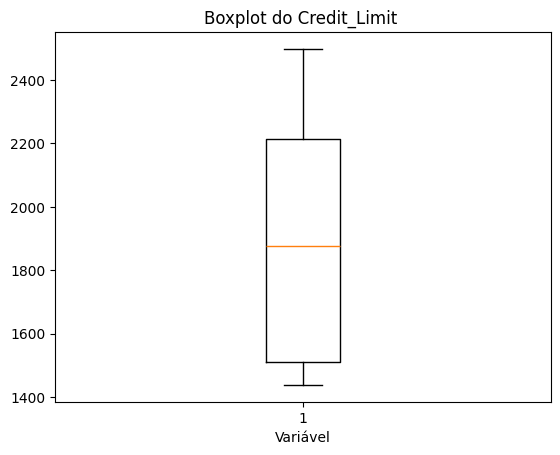

In [7]:
limite = 2500

data = valores_filtrados = data[data['Credit_Limit'] < limite]
plt.boxplot(data['Credit_Limit'])
plt.title('Boxplot do Credit_Limit ')
plt.xlabel('Variável')
plt.show()

In [8]:
features = data[['Customer_Age', 'Credit_Limit']]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

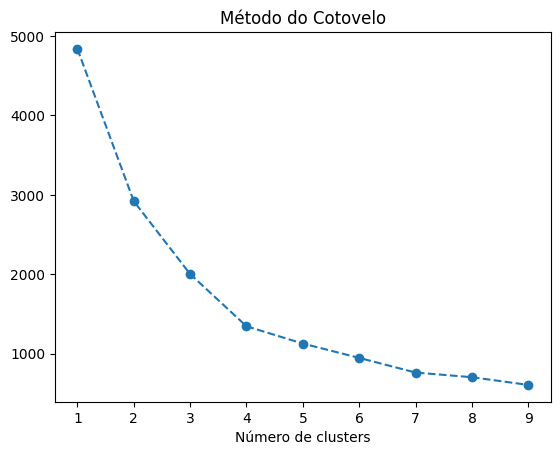

In [9]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 10), wcss, marker='o', linestyle='--')
plt.title('Método do Cotovelo')
plt.xlabel('Número de clusters')
plt.show()


In [10]:
num_clusters = 4

kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(scaled_features)


In [11]:
silhouette_avg = silhouette_score(scaled_features, clusters)

print(f"Métrica de Silhueta Média: {silhouette_avg}")

Métrica de Silhueta Média: 0.38393004943272585


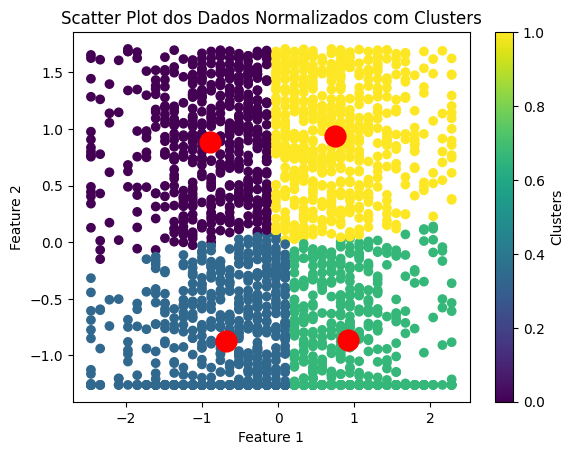

In [12]:
# Obtenha as coordenadas dos centróides
centroids = kmeans.cluster_centers_

# Obtenha as coordenadas x e y dos centróides
centroids_x = centroids[:, 0]  # Supondo que 'Customer_Age' é a primeira coluna
centroids_y = centroids[:, 1]  # Supondo que 'Avg_Open_To_Buy' é a segunda coluna

# Crie o scatter plot com os dados normalizados
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=clusters, cmap='viridis')

# Adicione os centróides ao gráfico de dispersão
plt.scatter(centroids_x, centroids_y, s=169, linewidths=3, color='r', zorder=10)

# Adicione títulos e rótulos
plt.title('Scatter Plot dos Dados Normalizados com Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Clusters')

# Mostre o gráfico
plt.show()

